In [1]:
import numpy as np
import matplotlib.pyplot as plt
import xarray as xr

import LidarProfileFunctions as lp
import ExternalDataFunctions as ex
import GVHSRLlib as gv

import glob
import datetime

/Users/mhayman/anaconda/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/Users/mhayman/anaconda/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


In [2]:
gv_data_path = '/Users/mhayman/Documents/HSRL/GVHSRL/SOCRATES/SOCRATESrf09/'
ncep_data_path = '/Users/mhayman/Documents/Python/lidar/external_data/'

In [3]:
gv_data_files = sorted(glob.glob(gv_data_path+'SOCRATES*GVHSRL*.nc'))
print(gv_data_files)
load_start = datetime.datetime(year=2019,month=2,day=5,hour=0,minute=10)
load_stop = datetime.datetime(year=2019,month=2,day=5,hour=0,minute=45)

['/Users/mhayman/Documents/HSRL/GVHSRL/SOCRATES/SOCRATESrf09/SOCRATESrf09_GVHSRL_20180204T2300_20180205T0000.nc', '/Users/mhayman/Documents/HSRL/GVHSRL/SOCRATES/SOCRATESrf09/SOCRATESrf09_GVHSRL_20180205T0000_20180205T0100.nc', '/Users/mhayman/Documents/HSRL/GVHSRL/SOCRATES/SOCRATESrf09/SOCRATESrf09_GVHSRL_20180205T0100_20180205T0200.nc', '/Users/mhayman/Documents/HSRL/GVHSRL/SOCRATES/SOCRATESrf09/SOCRATESrf09_GVHSRL_20180205T0200_20180205T0300.nc']


In [ ]:
hsrl_profile_list = ['Aerosol_Backscatter_Coefficient','Optical_Depth','Particle_Depolarization','Aerosol_Extinction_Coefficient']
profs,lidar_data,aircraft_data = gv.load_GVHSRL_processed_files(gv_data_files,hsrl_profile_list,lidar_vars=['lidar_pointing'],
                                air_vars = ['GGALT','ROLL','PITCH','GGLAT','GGLON','Time'],
                                load_mask = True,
                                time_start = load_start,
                                time_stop = load_stop,
                                path = '')

In [4]:
hsrl_ds = xr.open_dataset(gv_data_files[0], engine='netcdf4')
print(hsrl_ds.dims)

Frozen(SortedKeysDict({'lidar_pointingdim0': 3, 'GGLATdim0': 6664, 'PSXCdim0': 6664, 'THDGdim0': 6664, 'polarizationdim0': 6664, 'PITCHdim0': 6664, 'TASXdim0': 6664, 'ROLLdim0': 6664, 'lidar_pointingdim1': 6664, 'range_Raw_Low_Gain_Total_Backscatter_Channel': 4000, 'est_bin0dim0': 1, 'range': 1848, 'range_Raw_Cross_Polarization_Channel': 4000, 'ATXdim0': 6664, 'range_Raw_Unassigned_Channel': 4000, 'range_Raw_High_Gain_Total_Backscatter_Channel': 4000, 'time': 6664, 'GGLONdim0': 6664, 'GGALTdim0': 6664, 'TelescopeDirectiondim0': 6664, 'range_Raw_Molecular_Backscatter_Channel': 4000}))


In [ ]:
hsrl_ds.keys()

In [ ]:
#hsrl_ds['Aerosol_Backscatter_Coefficient'].attrs.keys()
hsrl_ds['time'].data
#hsrl_ds['GGALT'].plot()

In [ ]:
hsrl_ds['time'].plot()

In [22]:
lidar_pointing = xr.DataArray(data=hsrl_ds['lidar_pointing'].data, dims=['coordinate','time'], 
                    coords={'time': hsrl_ds['time'].data, 'coordinate':np.array([0,1,2])},
                    name='lidar_pointing_direction',
                    attrs={'description': 'unit vector indicating the lidar\'s pointing direction'})
lidar_range = hsrl_ds['range']
pixel_position = lidar_range*lidar_pointing


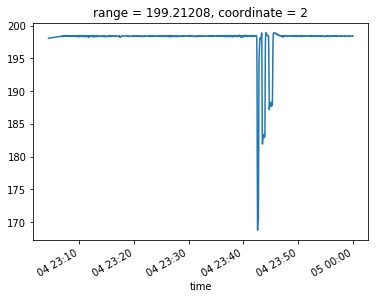

In [23]:
pixel_position.sel(coordinate=2,range=200,method='nearest').plot()

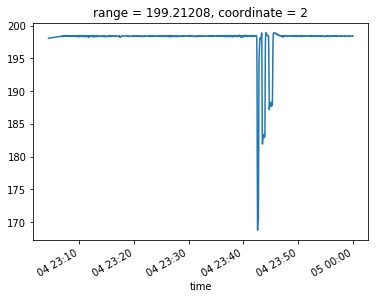

In [16]:
pixel_position.sel(coordinate=2,range=200,method='nearest').plot()